## __A Study on Stock Price of Crude Oil Time Series Forecasting with Simple Neural Networks and LSTM__

### Forecasting

* Forecasting is the estimation of the future values of a variable.
* We make forecasting about future events by drawing meaning from the models we obtained by using information from earlier periods.
* Strategies, plans and targets for the future are determined by forecasting. 
* Forecasting studies were initially realized with simple modeling experiments and then more complex models were established by using the advantages of techonology, and better results were obtanied.

### Forecasting Method: Artificial Neural Network (ANN)

Artificial neural networks are forecasting methods that are based on simple mathematical models of the brain. They allow complex nonlinear relationships between the response variable and its predictors.

A neural network can be thought of as a network of “neurons” which are organised in layers. The predictors (or inputs) form the bottom layer and the forecasts (or outputs) form the top layer. There may also be intermediate layers containing “hidden neurons”.

The simplest networks contain no hidden layers and are equivalent to linear regressions. This figure shows the neural network version of a linear regression with four predictors. The coefficients attached to these predictors are called “weights”. The forecasts are obtained by a linear combination of the inputs. The weights are selected in the neural network framework using a “learning algorithm” that minimises a “cost function” such as the MSE. 

<img src="https://otexts.com/fpp2/nnet2.png" style="width: 600px;"/> <br>
_A neural network with four inputs and one hidden layer with three hidden neurons._ <br>

### Forecasting Method: Long Short Term Memory (LSTM)

LSTM is a special type of RNN that can learn long-term dependencies. It was first introduced in 1997 by Hochreiter and Schmindhuber. LSTMs are designed to prevent the problem of long-term dependence and are widely used. 


![Rnn](https://camo.githubusercontent.com/a44d19bc6f7d2d8ef95452127f3d7e61dfd6379b/68747470733a2f2f692e6962622e636f2f7938546d3837312f526573696d312e706e67) 
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ A standart RNN has a single layer 
![LSTM](https://camo.githubusercontent.com/70fec97625524a11d1b7296ec18c13ac4b16dd37/68747470733a2f2f692e6962622e636f2f7a354d485368502f526573696d322e706e67)
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ LSTM has four specially placed layers

The line passing horizontally from the top along the diagram in the LSTM represents cell state. Data processed in layers contained in repeating modules has a certain effect on the values of cell state.
<br> ![cellstate](https://camo.githubusercontent.com/3cc728a04a43b4970bf862473b5680ed10453ef4/68747470733a2f2f692e6962622e636f2f564c5058364d772f526573696d332e706e67)

LSTM has ability to add or remove information to the cell state through structures called gates. The gate in the figure consists of a sigmoid network layer and point multiplication. 
<br> ![gate](https://camo.githubusercontent.com/0ed236e6916c452367c01cf8a1d1a6db47911b88/68747470733a2f2f692e6962622e636f2f784d665a6851772f526573696d332d352e706e67)

<img src="https://camo.githubusercontent.com/623dc99da4b11773ac862bc61844994da77b34ce/68747470733a2f2f692e6962622e636f2f3452354a53714b2f526573696d342e706e67" style="width: 700px;"/> 

<br>
<br>
LSTM firstly determines which information passes through the cell state. This decision is made by sigmoid layer which is called forget gate layer. 

![](https://camo.githubusercontent.com/8ba9e82854ade2c8646edd3b3589c8fd4f54ec29/68747470733a2f2f692e6962622e636f2f4d7044527162772f526573696d352e706e67) ![](https://camo.githubusercontent.com/27d1a141e78dc5e90ccb54e4215c30cf53d14447/68747470733a2f2f692e6962622e636f2f39477a337674422f526573696d362e706e67)

The next step is to decide which new information is stored in cell state. This happens in two steps. Firstly, the sigmoid layer called input gate layer (update gate) decides which value to refresh.

The tanh layer creates new candidate values. Cell state is refreshed by combining these two generated values. This newly obtained values is the value stored for each state value to be transferred to next block. 

![](https://camo.githubusercontent.com/49bc070ed5fc3183fe134fa9ccbda98a5c465656/68747470733a2f2f692e6962622e636f2f4c3534744a72442f526573696d372e706e67) ![](https://camo.githubusercontent.com/7b094617e63e11993b628e3fdd641676362b18ef/68747470733a2f2f692e6962622e636f2f355474785671332f526573696d382e706e67)

At the last step, it  should be decided that what the output will be. Cell state for ouput is applied to tanh function in the sigmoid layer and multiplication with output value of sigmoid gate.(the value is set to -1 to 1) Thus, the value for decided part of the output is obtained. 
<br> ![](https://camo.githubusercontent.com/aca69a19f65aa774e2986e10b900f4fc4e067a6d/68747470733a2f2f692e6962622e636f2f7658787a5671742f526573696d392e706e67)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM
print("All libraries have been imported")

All libraries have been imported


### The Data

Crude Oil WTI CL=F Stock Price
<br> I get the data from "finance.yahoo.com". Dataset can be downloaded from [here](https://ca.finance.yahoo.com/quote/CL%3DF/history?period1=1262304000&period2=1577836800&interval=1d&filter=history&frequency=1d). I set the date range from Jan 01, 2010 to Jan 01, 2020 . 

Load the data into a Pandas dataframe and have a quick peek of the head rows.

In [6]:
df = pd.read_csv('CrudeOil.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,120372.0
1,2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,263542.0
2,2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,258887.0
3,2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,370059.0
4,2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,246632.0
5,2010-01-10,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-01-11,82.879997,83.949997,81.959999,82.519997,82.519997,310377.0
7,2010-01-12,82.070000,82.339996,79.910004,80.790001,80.790001,296304.0
8,2010-01-13,80.059998,80.669998,78.370003,79.650002,79.650002,333866.0
9,2010-01-14,79.629997,80.360001,78.919998,79.389999,79.389999,401627.0


We have NaN values and we drop these values.

In [7]:
df.dropna(inplace=True)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,79.629997,81.680000,79.629997,81.510002,81.510002,120372.0
1,2010-01-05,81.629997,82.000000,80.949997,81.769997,81.769997,263542.0
2,2010-01-06,81.430000,83.519997,80.849998,83.180000,83.180000,258887.0
3,2010-01-07,83.199997,83.360001,82.260002,82.660004,82.660004,370059.0
4,2010-01-08,82.650002,83.470001,81.800003,82.750000,82.750000,246632.0
6,2010-01-11,82.879997,83.949997,81.959999,82.519997,82.519997,310377.0
7,2010-01-12,82.070000,82.339996,79.910004,80.790001,80.790001,296304.0
8,2010-01-13,80.059998,80.669998,78.370003,79.650002,79.650002,333866.0
9,2010-01-14,79.629997,80.360001,78.919998,79.389999,79.389999,401627.0
10,2010-01-15,79.199997,79.309998,77.699997,78.000000,78.000000,275404.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 0 to 3037
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2495 non-null   object 
 1   Open       2495 non-null   float64
 2   High       2495 non-null   float64
 3   Low        2495 non-null   float64
 4   Close      2495 non-null   float64
 5   Adj Close  2495 non-null   float64
 6   Volume     2495 non-null   float64
dtypes: float64(6), object(1)
memory usage: 155.9+ KB


<br>
We will drop the columns we don't need then convert "Date" column to datatime data type and set "Date" column to index.

In [9]:
df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 0 to 3037
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2495 non-null   object 
 1   Adj Close  2495 non-null   float64
dtypes: float64(1), object(1)
memory usage: 58.5+ KB


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df_chg= df.set_index(['Date'], drop=True)
df_chg.head()

,Adj Close
Date,
2010-01-04,81.510002
2010-01-05,81.769997
2010-01-06,83.180000
2010-01-07,82.660004
2010-01-08,82.750000


### The Plotting

We plot a time series line plot

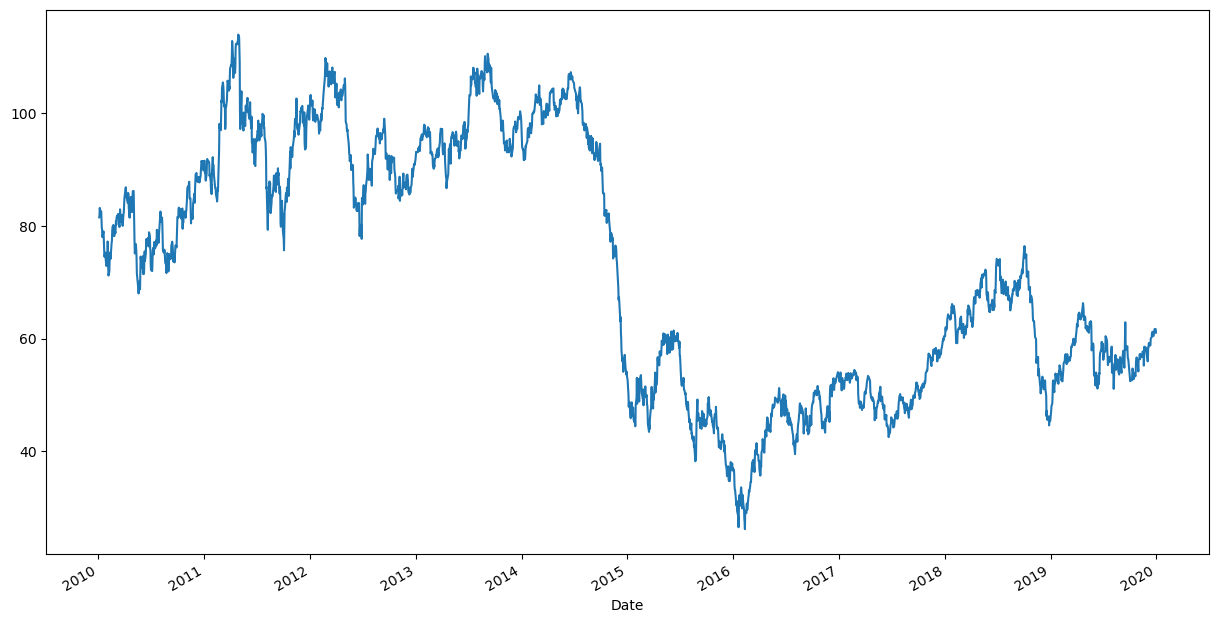

In [12]:
plt.figure(figsize=(15,8))
df_chg['Adj Close'].plot();

As can be seen, the "Adj Close" data are quite erratic.

### Split The Data

We split the data by nearly %80 and %20 to train and test. Split the data to train and test set by date "2017-12-27". That is, the data prior to this date is the traning data and the data from this data onward is the test data and we plotting it again.

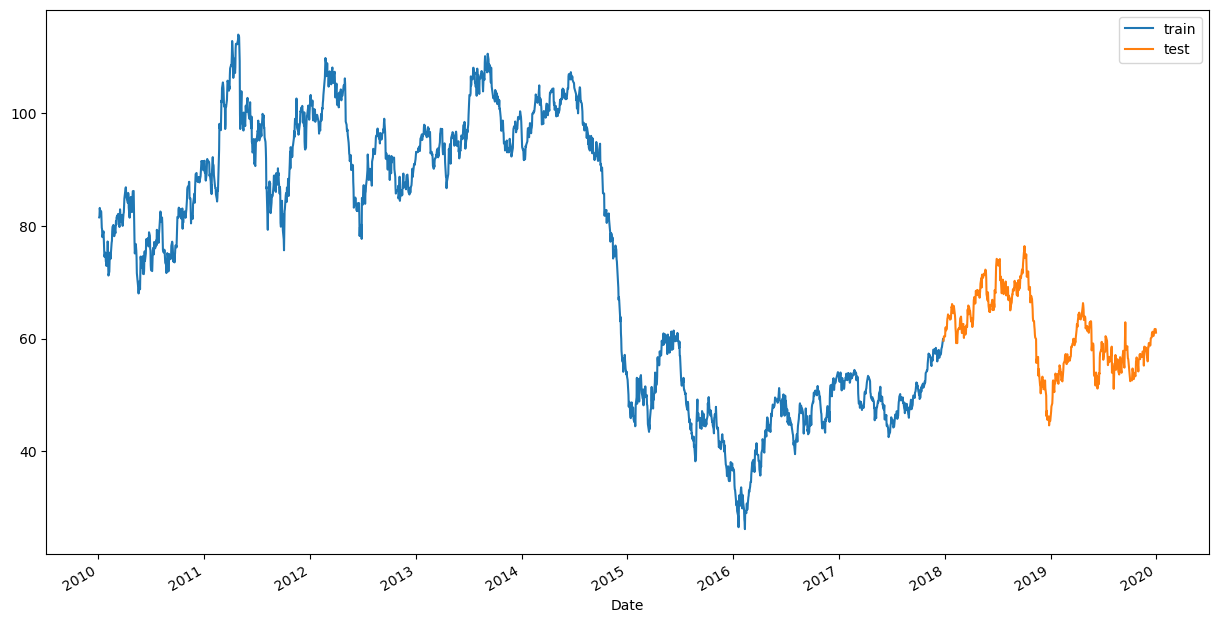

In [13]:
split_date = pd.Timestamp('2017-12-27')
df1 = df_chg['Adj Close']
train = df1.loc[:split_date]
test = df1.loc[split_date:]
plt.figure(figsize=(15,8))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

### Scale The Data

We scale train and test data to [-1, 1]

We splited train and test with Date values. We have to convert datas.

In [14]:
print("We have", len(train), "train values")
print("We have", len(test), "test values")

We have 1996 train values
We have 500 test values


<br>
We split train and test again 

In [11]:
train_processed = df_chg.iloc[:, 0:1].values
train_processed = train_processed[0:1996:1]
test_processed = df_chg.iloc[:, 0:1].values
test_processed = test_processed[1995:2495:1]

and scale datas

In [12]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(train_processed)
test_sc = scaler.transform(test_processed)

Get traning and test data

In [13]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

In [14]:
X_test = test_sc[:-1]
y_test = test_sc[1:]

### Simple ANN - Traning Model

* We create a Sequantial model
* add layers via the .add() method
* Pass an input_dim argument to the first layer.
* The activation function is the Rectified Linear Unit- Relu.
* Configure the learning process, which is done via the compile method.
* A loss function is mean_squared_error , and An optimizer is adam.
* Stop training when a monitored loss has stopped improving.
* patience=2, indicate number of epochs with no improvement after which training will be stopped.
* The ANN is trained for 100 epochs and a batch size of 1 is used.

In [15]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0041
Epoch 2/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0015
Epoch 3/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 4/100
1995/1995 [==============================] - 3s 2ms/step - loss: 0.0014
Epoch 5/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0014
Epoch 6/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 7/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 8/100
1995/1995 [==============================] - 3s 2ms/step - loss: 0.0013
Epoch 9/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 10/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 11/100
1995/1995 [==============================] - 3s 1ms/step - loss: 0.0013
Epoch 12/100
1995/1995 [==============================] - 3s 1ms/step - lo

<br>
It had an early stopping at Epoch 19/100

We predict our model and get R2 scores for train and test.

In [16]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.949
The R2 score on the Test set is:	0.913


### LSTM - Traning Model

We use shift function that shifts the entire column by 1.

In [17]:
train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)


for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train['X_1']
y_train = y_train['Y']
X_test = X_test['X_1']
y_test = y_test['Y']

X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

We will need to convert all our input variables in a 3D vector form.

In [18]:
X_train_lmse = X_train.reshape(X_train.shape[0], 1, 1)
X_test_lmse = X_test.reshape(X_test.shape[0], 1, 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (1995, 1, 1)
Test shape:  (499, 1, 1)


* LSTM has a visible layer with 1 input.
* A hidden layer with LSTM neurons.
* We used relu activation function for the LSTM neurons. 
* A loss function is mean_squared_error , and An optimizer is adam.
* Stop training when a monitored loss has stopped improving.
* The LSTM is trained for 100 epoch and a batch size of 1 is used.

In [19]:
lstm_model = Sequential()
lstm_model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history_lstm_model = lstm_model.fit(X_train_lmse, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0059
Epoch 2/100
1995/1995 [==============================] - 5s 2ms/step - loss: 0.0020
Epoch 3/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0014
Epoch 4/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0013
Epoch 5/100
1995/1995 [==============================] - 5s 3ms/step - loss: 0.0013
Epoch 6/100
1995/1995 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 7/100
1995/1995 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 8/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0012
Epoch 9/100
1995/1995 [==============================] - 4s 2ms/step - loss: 0.0012
Epoch 10/100
1995/1995 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 11/100
1995/1995 [==============================] - 5s 2ms/step - loss: 0.0012
Epoch 12/100
1995/1995 [==============================] - 5s 2ms/step - lo

<br>
It had an early stopping at Epoch 35/100

We predict our LSTM model and get R2 scores for train and test.

In [25]:
y_pred_test_lstm = lstm_model.predict(X_test_lmse)
y_train_pred_lstm = lstm_model.predict(X_train_lmse)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_lstm)))

The R2 score on the Train set is:	0.967
The R2 score on the Test set is:	0.951


Compare test MSE of both models.

In [26]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
lstm_test_mse = lstm_model.evaluate(X_test_lmse, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)
print('LSTM: %f'%lstm_test_mse)

499/499 [==============================] - 1s 2ms/step - loss: 0.0011
NN: 0.001983
LSTM: 0.001105


### Forecasting

In [27]:
nn_y_pred_test = nn_model.predict(X_test)
lstm_y_pred_test = lstm_model.predict(X_test_lmse)

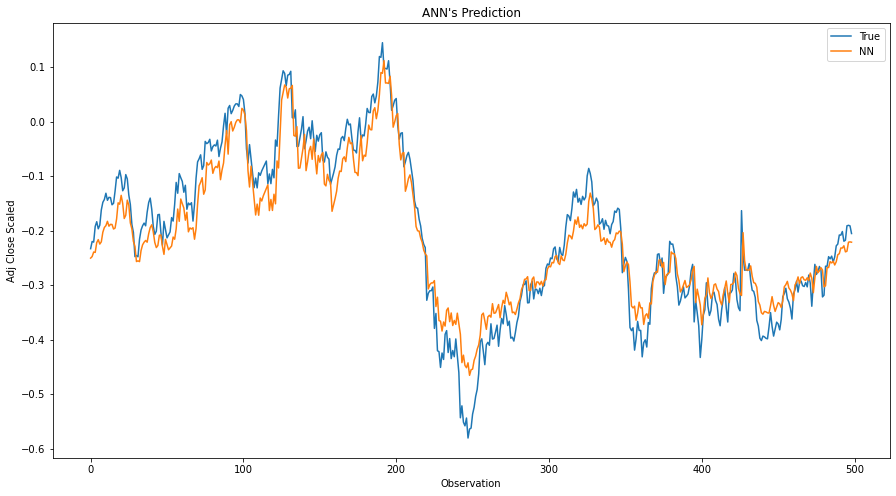

In [28]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("ANN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

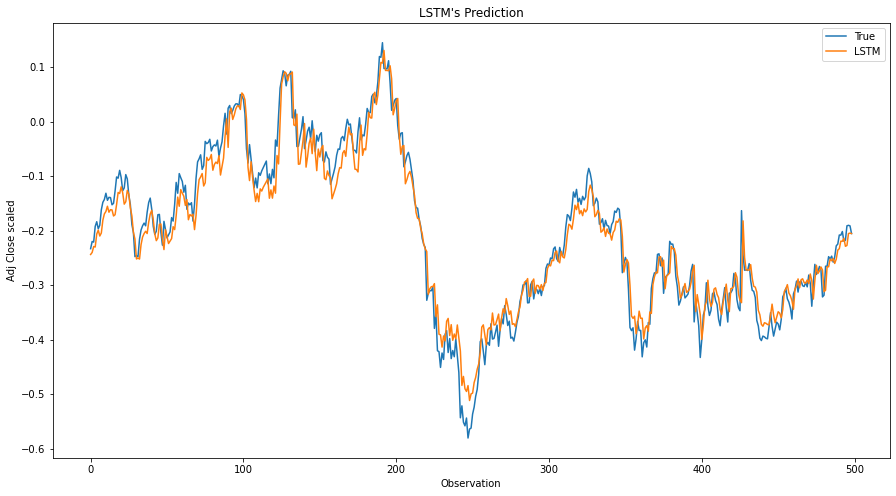

In [29]:
plt.figure(figsize=(15, 8))
plt.plot(y_test, label='True')
plt.plot(lstm_y_pred_test, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close scaled')
plt.legend()
plt.show();

### References

* https://mc.ai/an-introduction-on-time-series-forecasting-with-simple-neura-networks-lstm/
* https://otexts.com/fpp2/nnetar.html
* J. Schmidhuber, 2015
* Olah, Understanding LSTM Networks, 2015
* S. Hochreiter & J. Schmidhuber, Long Short-Term Memory, Neural Computation 9(8):1735-1780, 1997
* https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/#:~:text=the%20validation%20dataset.-,Early%20Stopping%20in%20Keras,configured%20when%20instantiated%20via%20arguments